# <center>Solution</center><center><small>**Travelling Salesman Problem**</small></center>

## Our Approach:
We will modify the Stochastic Search algorithm to solve the TSP optimisation problem. 

### Import necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Read the Distance Matrix

In [2]:
dist_matr = np.genfromtxt("dist_matrix_TSP.csv",delimiter=',')
print(dist_matr)

[[  0.  83.  93. 129. 133. 139. 151. 169. 135. 114. 110.  98.  99.  95.
   81. 152. 159. 181. 172. 185. 147. 157. 185. 220. 127. 181.]
 [ 83.   0.  40.  53.  62.  64.  91. 116.  93.  84.  95.  98.  89.  68.
   67. 127. 156. 175. 152. 165. 160. 180. 223. 268. 179. 197.]
 [ 93.  40.   0.  42.  42.  49.  59.  81.  54.  44.  58.  64.  54.  31.
   36.  86. 117. 135. 112. 125. 124. 147. 193. 241. 157. 161.]
 [129.  53.  42.   0.  11.  11.  46.  72.  65.  70.  88. 100.  89.  66.
   76. 102. 142. 156. 127. 139. 155. 180. 228. 278. 197. 190.]
 [133.  62.  42.  11.   0.   9.  35.  61.  55.  62.  82.  95.  84.  62.
   74.  93. 133. 146. 117. 128. 148. 173. 222. 272. 194. 182.]
 [139.  64.  49.  11.   9.   0.  39.  65.  63.  71.  90. 103.  92.  71.
   82. 100. 141. 153. 124. 135. 156. 181. 230. 280. 202. 190.]
 [151.  91.  59.  46.  35.  39.   0.  26.  34.  52.  71.  88.  77.  63.
   78.  66. 110. 119.  88.  98. 130. 156. 206. 257. 188. 160.]
 [169. 116.  81.  72.  61.  65.  26.   0.  37.  59.  75

In [3]:
print(dist_matr.shape)

(26, 26)


In [4]:
print((dist_matr==dist_matr.T).all())

True


### Define the Distance function

In [5]:
def dist_func(a,dist_matrix):
    total_distance = 0
    i = 0
    for j in range(len(a)):
        total_distance += dist_matrix[a[j]][i]
        i = a[j]
    total_distance += dist_matrix[i][0]
    return total_distance

### Function to Swap two elements

In [6]:
def swap(x):
    sampled_idx = np.random.choice(len(x),2,replace=False)
    x[sampled_idx[0]],x[sampled_idx[1]] = x[sampled_idx[1]],x[sampled_idx[0]]
    return x

### Random re-initialize points

In [7]:
def rrI(arr,rri_num):
    rri = []
    for i in range(rri_num):
        new = np.random.permutation(arr)
        rri.append(new)
    rri = np.matrix(rri)
    return rri

### Function to obtain Optimum Path

In [8]:
def Optimum_path(path,dist_matrix,popsize,childNum,rri_num,maxIter):
    ## Generate the initial population
    population = []
    for i in range(popsize):
        random_path = np.random.permutation(path)
        population.append(random_path)
    population = np.matrix(population)
    
    for itr in range(maxIter):
        y_arr = []
        for i in range(population.shape[0]):
            a = np.ravel(population[i,:])
            y = dist_func(a,dist_matrix)
            y_arr.append(y)
        
        u_arr = [y_arr[i]-min(y_arr) for i in range(len(y_arr))]
        fit_score = [u_arr[i]/sum(u_arr) for i in range(len(u_arr))]
        child_num = [int(fit_score[i]*childNum) for i in range(len(y_arr))]
        child_arr = []
    ## Generate the children population
        for i in range(len(y_arr)):
            x_i = np.ravel(population[i,:])
            for j in range(child_num[i]):
                c = swap(x_i)
                child_arr.append(c)
        child_mat = np.matrix(child_arr)
    ## Generate the RRI population
        rri = rrI(path,rri_num)
        
        total_pop = np.vstack((population,child_mat,rri))
        fitness_arr = []
        
        for i in range(total_pop.shape[0]):
            a = np.ravel(total_pop[i,:])
            d = dist_func(a,dist_matrix)
            fitness_arr.append(d)
        
        fitness_arr = np.array(fitness_arr)
        min_idx = np.argsort(fitness_arr)
        
        useful_idx = min_idx[:popsize]
        useful_dist = fitness_arr[useful_idx]
        
        min_dist_idx = useful_idx[0]
        best_memb = total_pop[min_dist_idx,:]
        best_dist = useful_dist[0]
        
        print("Iteration: ",itr+1)
        print("Best Path till now is {}".format(best_memb))
        print("Best Distance till now is {}".format(best_dist))
        popList = []
        for i in range(len(useful_idx)):
            idx = useful_idx[i]
            popMember = np.ravel(total_pop[idx,:])
            popList.append(popMember)
        population = np.matrix(popList)

In [9]:
path = np.arange(1,26,1)
print(path)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]


In [10]:
Optimum_path(path,dist_matr,500,500,50,200)

Iteration:  1
Best Path till now is [[ 2 13 17  5  3  4  9  6 14  1 12 10 19 23 22 25 18 11  8 24 21  7 20 16
  15]]
Best Distance till now is 2064.0
Iteration:  2
Best Path till now is [[ 2 13 17  5  3  4  9  6 14  1 12 10 19 23 22 25 18 11  8 24 21  7 20 16
  15]]
Best Distance till now is 2064.0
Iteration:  3
Best Path till now is [[ 2 13 17  5  3  4  9  6 14  1 12 10 19 23 22 25 18 11  8 24 21  7 20 16
  15]]
Best Distance till now is 2064.0
Iteration:  4
Best Path till now is [[ 2 13 17  5  3  4  9  6 14  1 12 10 19 23 22 25 18 11  8 24 21  7 20 16
  15]]
Best Distance till now is 2064.0
Iteration:  5
Best Path till now is [[ 2 13 17  5  3  4  9  6 14  1 12 10 19 23 22 25 18 11  8 24 21  7 20 16
  15]]
Best Distance till now is 2064.0
Iteration:  6
Best Path till now is [[ 2 13 17  5  3  4  9  6 14  1 12 10 19 23 22 25 18 11  8 24 21  7 20 16
  15]]
Best Distance till now is 2064.0
Iteration:  7
Best Path till now is [[16 18  5  6 14 23 21 20 24 15  9 13  2  1  4  8  3 11 10 12 25

Iteration:  57
Best Path till now is [[ 3  5 21 11 10 19 16 25 23 24 22 17 18 20 12 13  9  1  4  6  7 15 14  2
   8]]
Best Distance till now is 1728.0
Iteration:  58
Best Path till now is [[ 3  5 21 11 10 19 16 25 23 24 22 17 18 20 12 13  9  1  4  6  7 15 14  2
   8]]
Best Distance till now is 1728.0
Iteration:  59
Best Path till now is [[ 3  5 21 11 10 19 16 25 23 24 22 17 18 20 12 13  9  1  4  6  7 15 14  2
   8]]
Best Distance till now is 1728.0
Iteration:  60
Best Path till now is [[ 3  5 21 11 10 19 16 25 23 24 22 17 18 20 12 13  9  1  4  6  7 15 14  2
   8]]
Best Distance till now is 1728.0
Iteration:  61
Best Path till now is [[ 3  5 21 11 10 19 16 25 23 24 22 17 18 20 12 13  9  1  4  6  7 15 14  2
   8]]
Best Distance till now is 1728.0
Iteration:  62
Best Path till now is [[ 3  5 21 11 10 19 16 25 23 24 22 17 18 20 12 13  9  1  4  6  7 15 14  2
   8]]
Best Distance till now is 1728.0
Iteration:  63
Best Path till now is [[ 3  5 21 11 10 19 16 25 23 24 22 17 18 20 12 13  9  1  

Iteration:  112
Best Path till now is [[10  8 18  7  6  4 15 19  9 12  1  3  5 11 14 13 21 25 22 23 24 16 17 20
   2]]
Best Distance till now is 1623.0
Iteration:  113
Best Path till now is [[10  8 18  7  6  4 15 19  9 12  1  3  5 11 14 13 21 25 22 23 24 16 17 20
   2]]
Best Distance till now is 1623.0
Iteration:  114
Best Path till now is [[10  8 18  7  6  4 15 19  9 12  1  3  5 11 14 13 21 25 22 23 24 16 17 20
   2]]
Best Distance till now is 1623.0
Iteration:  115
Best Path till now is [[10  8 18  7  6  4 15 19  9 12  1  3  5 11 14 13 21 25 22 23 24 16 17 20
   2]]
Best Distance till now is 1623.0
Iteration:  116
Best Path till now is [[10  8 18  7  6  4 15 19  9 12  1  3  5 11 14 13 21 25 22 23 24 16 17 20
   2]]
Best Distance till now is 1623.0
Iteration:  117
Best Path till now is [[10  8 18  7  6  4 15 19  9 12  1  3  5 11 14 13 21 25 22 23 24 16 17 20
   2]]
Best Distance till now is 1623.0
Iteration:  118
Best Path till now is [[10  8 18  7  6  4 15 19  9 12  1  3  5 11 14 13 

Iteration:  167
Best Path till now is [[10  8 18  7  6  4 15 19  9 12  1  3  5 11 14 13 21 25 22 23 24 16 17 20
   2]]
Best Distance till now is 1623.0
Iteration:  168
Best Path till now is [[10  8 18  7  6  4 15 19  9 12  1  3  5 11 14 13 21 25 22 23 24 16 17 20
   2]]
Best Distance till now is 1623.0
Iteration:  169
Best Path till now is [[10  8 18  7  6  4 15 19  9 12  1  3  5 11 14 13 21 25 22 23 24 16 17 20
   2]]
Best Distance till now is 1623.0
Iteration:  170
Best Path till now is [[10  8 18  7  6  4 15 19  9 12  1  3  5 11 14 13 21 25 22 23 24 16 17 20
   2]]
Best Distance till now is 1623.0
Iteration:  171
Best Path till now is [[10  8 18  7  6  4 15 19  9 12  1  3  5 11 14 13 21 25 22 23 24 16 17 20
   2]]
Best Distance till now is 1623.0
Iteration:  172
Best Path till now is [[10  8 18  7  6  4 15 19  9 12  1  3  5 11 14 13 21 25 22 23 24 16 17 20
   2]]
Best Distance till now is 1623.0
Iteration:  173
Best Path till now is [[10  8 18  7  6  4 15 19  9 12  1  3  5 11 14 13 

## Optimal Answer to this problem 

In [11]:
ans = np.array([24,23,22,25,21,20,16,17,19,18,15,10,11,12,14,13,9,8,7,6,4,5,3,2,1])
print("The minimum distance path is:")
print(str(0)+"->",end="")
for i in range(len(ans)):
    print(str(ans[i])+"->",end="")
print(str(0))
print("Minimum possible distance is {}".format(dist_func(ans,dist_matr)))

The minimum distance path is:
0->24->23->22->25->21->20->16->17->19->18->15->10->11->12->14->13->9->8->7->6->4->5->3->2->1->0
Minimum possible distance is 937.0


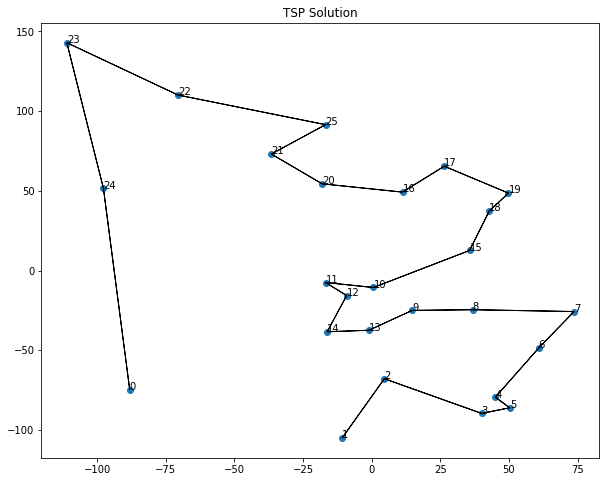

In [12]:
from sklearn.manifold import MDS #Multi-dimensional scaling
model = MDS(n_components=2,dissimilarity='precomputed',random_state=1)
out = model.fit_transform(dist_matr)

n = np.arange(26)
x = out[:,0]
y = out[:,1]
fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(x,y)
ax.arrow(x[0],y[0],x[ans[0]]-x[0],y[ans[0]]-y[0])
for i,txt in enumerate(n):
    if(i<24):
        ax.arrow(x[ans[i]],y[ans[i]],x[ans[i+1]]-x[ans[i]],y[ans[i+1]]-y[ans[i]])
    ax.annotate(txt,(x[i],y[i]))
plt.title("TSP Solution")
plt.show()